# DRLND Project 3 - Collaboration and Competition (Tennis environment)

---
This notebook presents a solution to the [Udacity Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) Project 3 - Collaboration and Competition of the [Unity3D](https://unity3d.com/machine-learning/) Udacity [Tennis environment (Mac version)](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P3/Tennis/Tennis.app.zip) (a version of the [Unity Tennis environment](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#tennis) modified to have a single pair of agents) where the goal is for the agents (tennis racquets) to move towards or away from the net and up and down so they collide with a ball before it collides with the floor, causing it to pass over the net ... but not collide with the back wall ("go out").  All play takes place in a 2D plane.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment! 

In [2]:
env = UnityEnvironment(file_name="/Users/johngraves/20181013/Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print("Using brain {}".format(brain_name))

Using brain TennisBrain


### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}\n'.format(states.shape[0],
                                                                            states.shape[1]))

state_vector_names = ['racket x pos     ', 'racket y pos     ', 'racket x velocity', 'racket y velocity',
                      'ball   x pos     ', 'ball   y pos     ', 'ball   x velocity', 'ball   y velocity']

print('The reshaped state vector for the first agent looks like:')
state_stack = states[0].reshape(3, 8)
_ = [print(state_vector_names[index], 
           state_stack[0][index], 
           state_stack[1][index], 
           state_stack[2][index]) for index in range(8)]

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24

The reshaped state vector for the first agent looks like:
racket x pos      0.0 0.0 -7.38993644714
racket y pos      0.0 0.0 -1.5
racket x velocity 0.0 0.0 -0.0
racket y velocity 0.0 0.0 0.0
ball   x pos      0.0 0.0 6.83172082901
ball   y pos      0.0 0.0 5.91759634018
ball   x velocity 0.0 0.0 -0.0
ball   y velocity 0.0 0.0 0.0


After a **step** in the environment ...

In [37]:
actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
env_info = env.step(actions)[brain_name]           # send all actions to tne environment
next_states = env_info.vector_observations         # get next state (for each agent)
print('The reshaped state vector for the first agent looks like:')
state_stack = next_states[0].reshape(3, 8)
_ = [print(state_vector_names[index], 
           state_stack[0][index], 
           state_stack[1][index], 
           state_stack[2][index]) for index in range(8)]

The reshaped state vector for the first agent looks like:
racket x pos      -7.97543001175 -4.97543048859 -7.97543001175
racket y pos      -1.5 -1.55886006355 -1.71581995487
racket x velocity -0.0 30.0 -30.0
racket y velocity 0.0 -0.981000006199 -1.9620000124
ball   x pos      7.98256969452 7.98256969452 7.98256969452
ball   y pos      5.89012813568 5.69392824173 5.39962816238
ball   x velocity -0.0 30.0 -30.0
ball   y velocity 0.0 -0.981000006199 -1.9620000124


... you can see how the position vector has shifted left one level in the **stack** of 3.

Thus, only the *final 8 values* of the state provide new information.

In [38]:
_ = [print(state_vector_names[index], 
           state_stack[2][index]) for index in range(8)]

racket x pos      -7.97543001175
racket y pos      -1.71581995487
racket x velocity -30.0
racket y velocity -1.9620000124
ball   x pos      7.98256969452
ball   y pos      5.39962816238
ball   x velocity -30.0
ball   y velocity -1.9620000124


We can reduce the observed state to just these values.

In [48]:
next_states = np.array([state.reshape(3, 8)[2] for state in next_states])
state_size = next_states.shape[1]
print('Now there are {} agents. Each observes a state with length: {}'.format(next_states.shape[0], state_size))
print('This yields a total observed state for both agents with length: {}'.format(num_agents * state_size))

Now there are 2 agents. Each observes a state with length: 8
This yields a total observed state for both agents with length: 16


Within these 16 state values, the x-y position of the ball as viewed by each agent should be the same, but for the sign of x.

In [12]:
def six_wide(l):
    return " ".join(["{:>6}".format(round(x,2)) for x in l])

In [13]:
print("              x      y  x-vel  y-vel")
next_states_rackets = [state[:4] for state in next_states]
_ = [print("Racket {}".format(i), six_wide(next_states_rackets[i])) for i in range(len(next_states_rackets))]
next_states_balls = [state[4:] for state in next_states]
_ = [print("Ball   {}".format(i), six_wide(next_states_balls[i])) for i in range(len(next_states_balls))]

              x      y  x-vel  y-vel
Racket 0  -6.88  -1.56   5.12  -0.98
Racket 1  -4.84  -1.56  18.56  -0.98
Ball   0   6.83   5.74   5.12  -0.98
Ball   1  -6.83   5.74  18.56  -0.98


The environment also returns a **reward** for each agent for each step. These are alternately zero.

In [14]:
env_info.rewards

[0.0, 0.0]

Finally, the environment returns a **done** flag for each agent.

In [15]:
env_info.local_done

[False, False]

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

In [43]:
for i in range(1, 6):                                      # play game for 5 episodes
    print("Episode {}:".format(i))
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        steps += 1                                         # count steps
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        if i == 5:
            print("Step {:>2}".format(steps), end=" ")
            if steps % 2 == 0:
                print("Even", rewards[0], round(rewards[1],3))
            else:
                print("Odd ", round(rewards[0],3), rewards[1])
                
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) after {} steps: {}'.format(steps, np.max(scores)))

Episode 1:
Score (max over agents) after 15 steps: 0.0
Episode 2:
Score (max over agents) after 14 steps: 0.0
Episode 3:
Score (max over agents) after 14 steps: 0.0
Episode 4:
Score (max over agents) after 14 steps: 0.0
Episode 5:
Step  1 Odd  0.0 0.0
Step  2 Even 0.0 0.0
Step  3 Odd  0.0 0.0
Step  4 Even 0.0 0.0
Step  5 Odd  0.0 0.0
Step  6 Even 0.0 0.0
Step  7 Odd  0.0 0.0
Step  8 Even 0.0 0.0
Step  9 Odd  0.0 0.0
Step 10 Even 0.0 0.0
Step 11 Odd  0.0 0.0
Step 12 Even 0.0 0.0
Step 13 Odd  0.0 0.0
Step 14 Even 0.0 -0.01
Score (max over agents) after 14 steps: 0.0


### 4. Train the Agents with Proximal Policy Optimization (PPO)
Run the code cells below to train the collaborative agents.

The PPO implementation here uses the **Modularized Implementation of Deep RL Algorithms in PyTorch** ([DeepRL repo](https://github.com/ShangtongZhang/DeepRL)) which has been cloned into the **DeepRL** subdirectory here with
```
git clone https://github.com/ShangtongZhang/DeepRL.git
```
An empty `__init__.py` file added to the DeepRL subdirectory enables a full import.

In [17]:
from DeepRL.deep_rl import *

This exposes the **BaseTask** and **PPOAgent** classes. 

In [18]:
_ = [print(item, eval("help({})".format(item))) for item in dir() if item in ['BaseTask', 'PPOAgent']]

Help on class BaseTask in module DeepRL.deep_rl.component.task:

class BaseTask(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  reset(self)
 |  
 |  seed(self, random_seed)
 |  
 |  set_monitor(self, env, log_dir)
 |  
 |  step(self, action)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

BaseTask None
Help on class PPOAgent in module DeepRL.deep_rl.agent.PPO_agent:

class PPOAgent(DeepRL.deep_rl.agent.BaseAgent.BaseAgent)
 |  Method resolution order:
 |      PPOAgent
 |      DeepRL.deep_rl.agent.BaseAgent.BaseAgent
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, config)
 |      Initialize self.  See help(type(self)) for accurate signature.


The modularity of the DeepRL implementation requires specification of a **Task** and configuration of an **Agent** (based on the classes above) and a call to the training loop.

First, we create **TennisTask** following examples in [task.py](https://github.com/ShangtongZhang/DeepRL/blob/master/deep_rl/component/task.py) to pass **action** into the environment at each step and return a tuple of
```
next_states, rewards, terminals, _
```
(see line 30 of [PPO_agent.py](https://github.com/ShangtongZhang/DeepRL/blob/master/deep_rl/agent/PPO_agent.py)) with `_` indicating the fourth parameter is unused. 

We will cumulate the step-wise returns of the agents (summed) until the episode is done, then return the total reward.

In [55]:
class TennisTask(BaseTask):
    def __init__(self):
        BaseTask.__init__(self)
        self.name = 'Tennis'
        self.env = env
        self.action_dim = num_agents * action_size  # one action for each agent
        self.state_dim = num_agents * state_size    # includes state of both agents
        self.total_reward = 0.0

    def step(self, action):
        # which agent this action applies to depends on whether the step is odd or even
        action = np.clip(action, -1, 1)
        env_info = self.env.step(action)[brain_name]
        next_state = env_info.vector_observations
        # take third set of 8 values in agent's stack, reshape to 16-value vector
        next_state = np.array([state.reshape(3, 8)[2] for state in next_state]).reshape(1, -1)
        # reward from inactive agent is zero
        reward = np.sum(env_info.rewards)
        done = np.any(env_info.local_done)
        
        self.total_reward += reward
        if done:
            rewards_deque.append(self.total_reward)
            rewards_all.append(self.total_reward)
            next_state = self.reset()
        return next_state, np.array([reward]), np.array([done]), None
        
    def reset(self):
        self.total_reward = 0.0
        env_info = self.env.reset(train_mode=True)[brain_name]
        next_state = env_info.vector_observations
        next_state = np.array([state.reshape(3, 8)[2] for state in next_state]).reshape(1, -1)
        return next_state
    
    def seed(self, random_seed):
        pass

Next we configure the **PPOAgent** following the **ppo_continuous** configuration in [examples.py](https://github.com/ShangtongZhang/DeepRL/blob/master/examples.py) (lines 393-416).

In [56]:
def ppo_continuous_tennis():
    config = Config()
    config.num_workers = 1
    task_fn = lambda : TennisTask()
    config.task_fn = task_fn
    config.eval_env = task_fn()

    config.network_fn = lambda: GaussianActorCriticNet(
        config.state_dim, config.action_dim, actor_body=FCBody(config.state_dim),
        critic_body=FCBody(config.state_dim))
    config.optimizer_fn = lambda params: torch.optim.Adam(params, 3e-4, eps=1e-5)
    config.discount = 0.99
    config.use_gae = True
    config.gae_tau = 0.95
    config.gradient_clip = 5
    config.rollout_length = 2048
    config.optimization_epochs = 10
    config.num_mini_batches = 32
    config.ppo_ratio_clip = 0.2
    config.log_interval = 2048
    config.max_steps = 2e7
    config.logger = get_logger()
    return config

Now we can instantiate the agent and create a model summary using [pytorch-summary](https://github.com/sksq96/pytorch-summary).

In [57]:
from torchsummary import summary
agent = PPOAgent(ppo_continuous_tennis())

In [58]:
print("Agent has {} states and {} actions".format(agent.config.state_dim, agent.config.action_dim))
summary(agent.network, input_size=(1, num_agents*state_size))

Agent has 16 states and 4 actions
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         DummyBody-1                [-1, 1, 16]               0
            Linear-2                [-1, 1, 64]           1,088
            Linear-3                [-1, 1, 64]           4,160
            FCBody-4                [-1, 1, 64]               0
            Linear-5                [-1, 1, 64]           1,088
            Linear-6                [-1, 1, 64]           4,160
            FCBody-7                [-1, 1, 64]               0
            Linear-8                 [-1, 1, 4]             260
            Linear-9                 [-1, 1, 1]              65
Total params: 10,821
Trainable params: 10,821
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
-----------

Finally, we customize the **run_steps** loop found in [misc.py](https://github.com/ShangtongZhang/DeepRL/blob/master/deep_rl/utils/misc.py) to halt if we reach our target: the average reward (over 100 episodes) should be at least +0.5.

In [59]:
def run_steps_tennis(agent):
    random_seed()
    config = agent.config
    agent_name = agent.__class__.__name__
    t0 = time.time()
    while True:
        if config.save_interval and not agent.total_steps % config.save_interval:
            agent.save('data/model-%s-%s-%s.bin' % (agent_name, config.task_name, config.tag))
        if config.log_interval and not agent.total_steps % config.log_interval and len(agent.episode_rewards):
            rewards = agent.episode_rewards
            agent.episode_rewards = []
            config.logger.info('total steps %d, returns %.2f/%.2f/%.2f/%.2f (mean/median/min/max), %.2f steps/s' % (
                agent.total_steps, np.mean(rewards), np.median(rewards), np.min(rewards), np.max(rewards),
                config.log_interval / (time.time() - t0)))
            t0 = time.time()
            
        # Stop if goal met
        if (len(rewards_deque) >= 100) and (np.mean(rewards_deque) >= 0.5):
            agent.save('final.wts')
            agent.close()
            break

        # Stop if beyond max_steps
        if config.max_steps and agent.total_steps >= config.max_steps:
            agent.close()
            break
        agent.step()

In [60]:
from collections import deque

rewards_deque = deque(maxlen=100)
rewards_all = []
run_steps_tennis(agent)

INFO:MAIN:total steps 2048, returns 0.01/-0.01/-0.01/0.19 (mean/median/min/max), 285.47 steps/s
INFO:MAIN:total steps 4096, returns 0.00/-0.01/-0.01/0.09 (mean/median/min/max), 307.00 steps/s
INFO:MAIN:total steps 6144, returns 0.02/-0.01/-0.01/0.29 (mean/median/min/max), 306.69 steps/s
INFO:MAIN:total steps 8192, returns 0.01/-0.01/-0.01/0.29 (mean/median/min/max), 298.38 steps/s
INFO:MAIN:total steps 10240, returns 0.01/-0.01/-0.01/0.19 (mean/median/min/max), 308.15 steps/s
INFO:MAIN:total steps 12288, returns 0.01/-0.01/-0.01/0.19 (mean/median/min/max), 309.19 steps/s
INFO:MAIN:total steps 14336, returns 0.01/-0.01/-0.01/0.29 (mean/median/min/max), 307.01 steps/s
INFO:MAIN:total steps 16384, returns 0.01/-0.01/-0.01/0.19 (mean/median/min/max), 290.97 steps/s
INFO:MAIN:total steps 18432, returns 0.02/-0.01/-0.01/0.19 (mean/median/min/max), 291.42 steps/s
INFO:MAIN:total steps 20480, returns 0.02/-0.01/-0.01/0.29 (mean/median/min/max), 306.11 steps/s
INFO:MAIN:total steps 22528, retur

INFO:MAIN:total steps 176128, returns 0.05/0.09/-0.01/0.29 (mean/median/min/max), 310.69 steps/s
INFO:MAIN:total steps 178176, returns 0.05/0.09/-0.01/0.19 (mean/median/min/max), 309.01 steps/s
INFO:MAIN:total steps 180224, returns 0.06/0.09/-0.01/0.39 (mean/median/min/max), 308.37 steps/s
INFO:MAIN:total steps 182272, returns 0.05/0.09/-0.01/0.29 (mean/median/min/max), 307.85 steps/s
INFO:MAIN:total steps 184320, returns 0.04/-0.01/-0.01/0.19 (mean/median/min/max), 305.69 steps/s
INFO:MAIN:total steps 186368, returns 0.05/0.09/-0.01/0.19 (mean/median/min/max), 312.37 steps/s
INFO:MAIN:total steps 188416, returns 0.07/0.09/-0.01/0.49 (mean/median/min/max), 306.92 steps/s
INFO:MAIN:total steps 190464, returns 0.06/0.09/-0.01/0.19 (mean/median/min/max), 310.68 steps/s
INFO:MAIN:total steps 192512, returns 0.06/0.09/-0.01/0.29 (mean/median/min/max), 308.75 steps/s
INFO:MAIN:total steps 194560, returns 0.05/0.09/-0.01/0.19 (mean/median/min/max), 303.92 steps/s
INFO:MAIN:total steps 196608,

INFO:MAIN:total steps 350208, returns 0.08/0.09/-0.01/0.79 (mean/median/min/max), 311.33 steps/s
INFO:MAIN:total steps 352256, returns 0.09/0.09/-0.01/0.49 (mean/median/min/max), 312.70 steps/s
INFO:MAIN:total steps 354304, returns 0.10/0.09/-0.01/0.59 (mean/median/min/max), 310.94 steps/s
INFO:MAIN:total steps 356352, returns 0.08/0.09/-0.01/0.49 (mean/median/min/max), 306.60 steps/s
INFO:MAIN:total steps 358400, returns 0.08/0.09/-0.02/0.49 (mean/median/min/max), 313.33 steps/s
INFO:MAIN:total steps 360448, returns 0.09/0.09/-0.01/0.39 (mean/median/min/max), 309.66 steps/s
INFO:MAIN:total steps 362496, returns 0.06/0.09/-0.01/0.59 (mean/median/min/max), 310.92 steps/s
INFO:MAIN:total steps 364544, returns 0.08/0.09/-0.01/0.39 (mean/median/min/max), 311.37 steps/s
INFO:MAIN:total steps 366592, returns 0.10/0.09/-0.01/0.49 (mean/median/min/max), 304.95 steps/s
INFO:MAIN:total steps 368640, returns 0.11/0.09/-0.01/0.49 (mean/median/min/max), 309.70 steps/s
INFO:MAIN:total steps 370688, 

INFO:MAIN:total steps 524288, returns 0.12/0.09/-0.01/0.49 (mean/median/min/max), 309.55 steps/s
INFO:MAIN:total steps 526336, returns 0.12/0.09/-0.01/0.39 (mean/median/min/max), 312.36 steps/s
INFO:MAIN:total steps 528384, returns 0.14/0.09/-0.01/0.59 (mean/median/min/max), 307.50 steps/s
INFO:MAIN:total steps 530432, returns 0.18/0.09/-0.01/1.19 (mean/median/min/max), 307.01 steps/s
INFO:MAIN:total steps 532480, returns 0.18/0.09/-0.01/0.59 (mean/median/min/max), 311.90 steps/s
INFO:MAIN:total steps 534528, returns 0.16/0.09/-0.01/0.69 (mean/median/min/max), 311.47 steps/s
INFO:MAIN:total steps 536576, returns 0.12/0.09/-0.01/0.69 (mean/median/min/max), 312.18 steps/s
INFO:MAIN:total steps 538624, returns 0.16/0.09/-0.01/0.59 (mean/median/min/max), 312.27 steps/s
INFO:MAIN:total steps 540672, returns 0.17/0.09/-0.01/0.89 (mean/median/min/max), 307.76 steps/s
INFO:MAIN:total steps 542720, returns 0.15/0.09/-0.01/0.69 (mean/median/min/max), 308.86 steps/s
INFO:MAIN:total steps 544768, 

INFO:MAIN:total steps 698368, returns 0.36/0.19/-0.01/1.29 (mean/median/min/max), 311.32 steps/s
INFO:MAIN:total steps 700416, returns 0.46/0.19/-0.01/1.99 (mean/median/min/max), 311.35 steps/s
INFO:MAIN:total steps 702464, returns 0.45/0.19/-0.01/2.19 (mean/median/min/max), 313.23 steps/s
INFO:MAIN:total steps 704512, returns 0.21/0.19/-0.01/0.89 (mean/median/min/max), 304.87 steps/s
INFO:MAIN:total steps 706560, returns 0.35/0.19/0.09/1.99 (mean/median/min/max), 310.92 steps/s
INFO:MAIN:total steps 708608, returns 0.29/0.19/-0.01/1.09 (mean/median/min/max), 312.94 steps/s
INFO:MAIN:total steps 710656, returns 0.26/0.19/-0.01/0.99 (mean/median/min/max), 312.26 steps/s
INFO:MAIN:total steps 712704, returns 0.25/0.19/-0.01/1.09 (mean/median/min/max), 311.07 steps/s
INFO:MAIN:total steps 714752, returns 0.39/0.09/-0.01/2.49 (mean/median/min/max), 304.60 steps/s
INFO:MAIN:total steps 716800, returns 0.38/0.29/-0.01/1.49 (mean/median/min/max), 312.28 steps/s
INFO:MAIN:total steps 718848, r

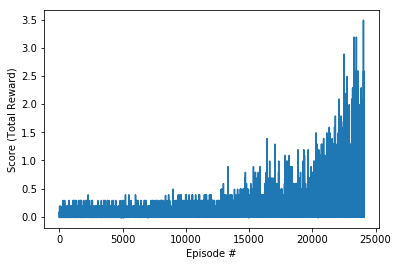

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(rewards_all)), rewards_all)
plt.ylabel('Score (Total Reward)')
plt.xlabel('Episode #')
plt.show()

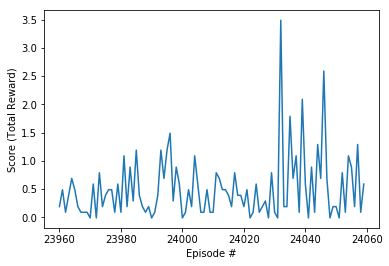

In [62]:
plt.plot(np.arange(len(rewards_all) - 100, len(rewards_all)), rewards_all[-100:])
plt.ylabel('Score (Total Reward)')
plt.xlabel('Episode #')
plt.show()

In [63]:
print("Total Score - Average - over last 100 episodes: {}".format(np.mean(rewards_deque)))

Total Score - Average - over last 100 episodes: 0.503000007905066


In [64]:
print("Total Score - Min - over last 100 episodes: {}".format(np.min(rewards_deque)))

Total Score - Min - over last 100 episodes: -0.009999999776482582


When finished, you can close the environment.

In [65]:
env.close()